## Packages/Library yang Digunakan

In [ ]:
# --- Library utama ---
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

## Data Understanding

### Load Dataset & Data Understanding

Dataset Top Spotify songs from 2010-2019-BY YEAR diambil dari Google Drive dan dimuat menggunakan `pandas.read_csv()`. Dataset ini berisi informasi tentang lagu-lagu terpopuler di dunia dari tahun 2010-2019, menurut data yang tersedia di Spotify dan diselaraskan dengan peringkat dari Billboard.

Pada tahap ini juga dilakukan eksplorasi awal terhadap data:
- Melihat jumlah baris dan kolom
- Melihat informasi struktur data
- Menampilkan contoh data
- Mengecek missing values dan duplikat
- Mengetahui distribusi lagu per tahun
- Mengetahui genre terpopuler
- Mengetahui korelasi antar fitur numerik
- Mengetahui distribusi fitur numerik


In [ ]:
# --- Load dan persiapan data ---
df = pd.read_csv("top10s.csv", encoding='ISO-8859-1')

# Jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {df.shape}")

# Informasi struktur data
df.info()

Jumlah baris dan kolom: (603, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [ ]:
df.head()

,unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,db,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
# Cek jumlah data duplikat (baris yang sama persis)
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


In [ ]:
# Jumlah nilai kosong per kolom
df.isnull().sum()

,0
Unnamed: 0,0
title,0
artist,0
top genre,0
year,0
bpm,0
nrgy,0
dnce,0
dB,0
live,0


<ipython-input-5-544b58e9b3a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='coolwarm')


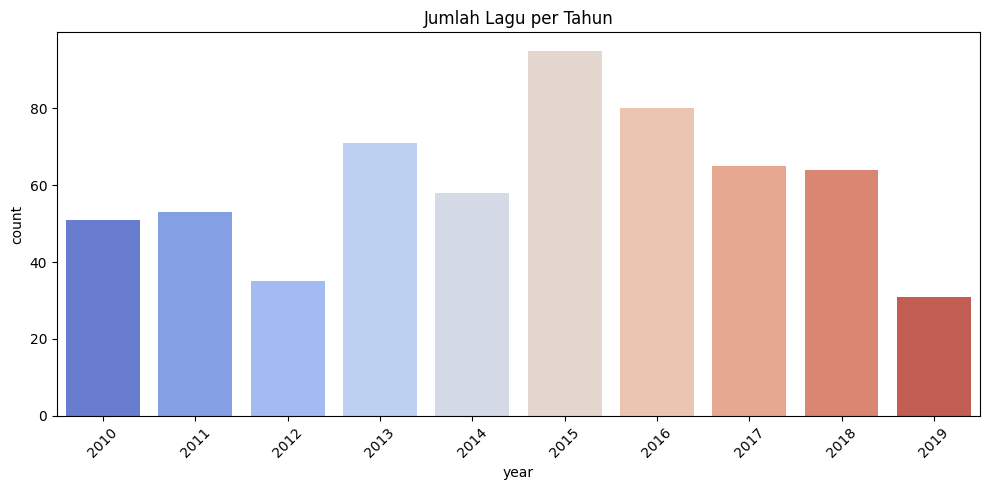

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year', palette='coolwarm')
plt.title('Jumlah Lagu per Tahun')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan jumlah lagu populer yang tercatat dalam dataset berdasarkan tahun rilisnya. Dapat dilihat lagu populer terbanyak yang tercatat dalam dataset terdapat pada tahun 2015

<ipython-input-6-644a49dff50f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


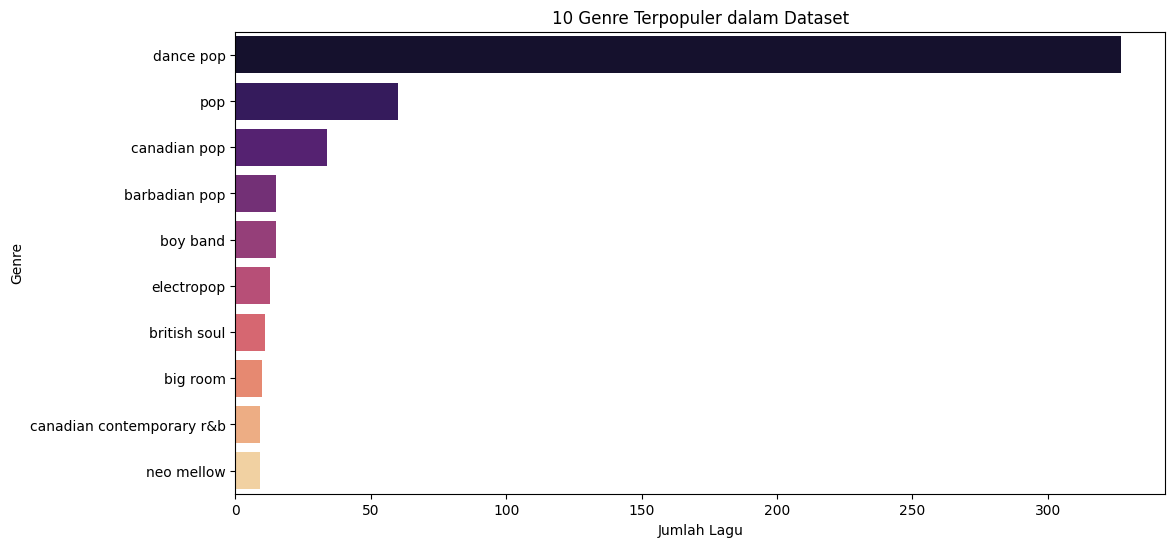

In [ ]:
plt.figure(figsize=(12, 6))
top_genres = df['top genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('10 Genre Terpopuler dalam Dataset')
plt.xlabel('Jumlah Lagu')
plt.ylabel('Genre')
plt.show()

Barplot diatas menunjukkan 10 genre terpopuler berdasarkan frekuensi kemunculannya dalam dataset. Dapat dilihat genre ter-populer adalah dance pop

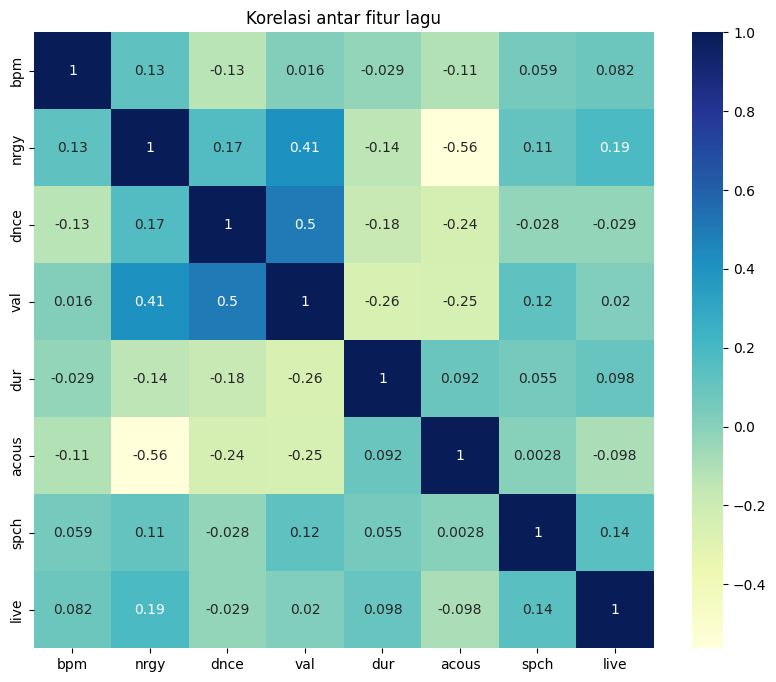

In [ ]:
features = ['bpm', 'nrgy', 'dnce', 'val', 'dur', 'acous', 'spch', 'live']
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='YlGnBu')
plt.title('Korelasi antar fitur lagu')
plt.show()

Heatmap korelasi antar fitur lagu menunjukkan bahwa fitur-fitur seperti **bpm** dan **nrgy** memiliki hubungan positif, sementara **nrgy** dan **acous** menunjukkan korelasi negatif. Secara umum, fitur tidak terlalu berkorelasi kuat, sehingga semuanya layak digunakan dalam model.

## Data Preparation

In [ ]:
df = df.loc[:, ~df.columns.str.lower().str.contains("unnamed")]

In [ ]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,db,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
df.columns = df.columns.str.lower()

# Fitur numerik
features = ['bpm', 'nrgy', 'dnce', 'val', 'dur', 'acous', 'spch', 'live']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

## Modeling

In [ ]:
similarity_matrix = cosine_similarity(df_scaled[features])

### Fungsi-fungsi Rekomendasi

In [ ]:
# Rekmondasi berdasarkan judul lagu
def recommend_by_title(song_title, df, similarity_matrix, top_n=10):
    idx = df[df['title'].str.lower() == song_title.lower()].index
    if len(idx) == 0:
        return f"Lagu '{song_title}' tidak ditemukan dalam dataset."
    idx = idx[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    return df.iloc[[i[0] for i in sim_scores]][['title', 'artist', 'top genre']].reset_index(drop=True)

# Rekomendasi berdasarkan genre
def recommend_by_genre(genre, df, similarity_matrix, top_n=10):
    genre_df = df[df['top genre'].str.lower() == genre.lower()]
    if genre_df.empty:
        return f"Genre '{genre}' tidak ditemukan dalam dataset."
    idx = genre_df.index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    return df.iloc[[i[0] for i in sim_scores]][['title', 'artist', 'top genre']].reset_index(drop=True)

# Rekomendasi berdasarkan artis
def recommend_by_artist(artist, df, similarity_matrix, top_n=10):
    artist_df = df[df['artist'].str.lower() == artist.lower()]
    if artist_df.empty:
        return f"Artis '{artist}' tidak ditemukan dalam dataset."
    idx_list = artist_df.index.tolist()
    avg_similarity = similarity_matrix[idx_list].mean(axis=0)
    sim_scores = list(enumerate(avg_similarity))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [s for s in sim_scores if s[0] not in idx_list][:top_n]
    return df.iloc[[i[0] for i in sim_scores]][['title', 'artist', 'top genre']].reset_index(drop=True)

### Interface menggunakan ipywidget

In [ ]:
# Dropdown mode rekomendasi
mode_dropdown = widgets.Dropdown(
    options=['Judul Lagu', 'Genre', 'Artis'],
    description='Mode Rekomendasi:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

# Dropdown input (judul, genre, artis)
input_dropdown = widgets.Dropdown(
    options=[],  # Akan diisi berdasarkan mode
    description='Input:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

# Tombol & output
recommend_button = widgets.Button(description="Rekomendasikan")
output = widgets.Output()

# Update input sesuai mode
def update_input_options(change):
    mode = change['new']
    if mode == 'Judul Lagu':
        input_dropdown.options = sorted(df['title'].unique().tolist())
    elif mode == 'Genre':
        input_dropdown.options = sorted(df['top genre'].unique().tolist())
    elif mode == 'Artis':
        input_dropdown.options = sorted(df['artist'].unique().tolist())

mode_dropdown.observe(update_input_options, names='value')
update_input_options({'new': mode_dropdown.value})  # Set awal

# Fungsi tombol klik
def on_button_clicked(b):
    with output:
        output.clear_output()
        mode = mode_dropdown.value
        input_value = input_dropdown.value

        if mode == 'Judul Lagu':
            display(recommend_by_title(input_value, df, similarity_matrix))
        elif mode == 'Genre':
            display(recommend_by_genre(input_value, df, similarity_matrix))
        elif mode == 'Artis':
            display(recommend_by_artist(input_value, df, similarity_matrix))

recommend_button.on_click(on_button_clicked)

# Tampilkan semua widget
display(mode_dropdown, input_dropdown, recommend_button, output)

Dropdown(description='Mode Rekomendasi:', layout=Layout(width='60%'), options=('Judul Lagu', 'Genre', 'Artis')…

Dropdown(description='Input:', layout=Layout(width='60%'), options=('#Beautiful', '#SELFIE', '#thatPOWER', '..…

Button(description='Rekomendasikan', style=ButtonStyle())

Output()

## Evaluasi